In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 6.1

In [2]:
def rk_step(y0, dt, rhs):
    k1 = rhs(y0)
    k2 = rhs(y0+dt/2*k1)
    k3 = rhs(y0+dt/2*k2)
    k4 = rhs(y0+dt*k3)
    return y0+dt/6*(k1+2*k2+2*k3+k4)

In [6]:
def rhs(y):
    w0 = 1.
    dydt = np.zeros(len(y))
    dydt[0] = y[1]
    beta = 0.1
    dydt[1] = -w0**2 * y[0] -2.*beta*y[1]
    return dydt

In [7]:
y = np.array([0,1])
Nsteps = 1000
dt = 0.1
ys = np.zeros((Nsteps, len(y)))
for i in range(Nsteps):
    ys[i] = y
    y = rk_step(y, dt, rhs)

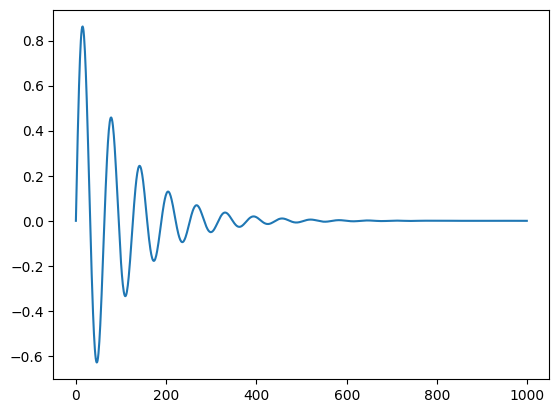

In [8]:
fig, ax = plt.subplots()
ax.plot(ys[:,0])

# 6.2

In [61]:
def rk_step(y0, t, dt, rhs):
    k1 = rhs(y0, t)
    k2 = rhs(y0+dt/2*k1, t+dt/2.)
    k3 = rhs(y0+dt/2*k2, t+dt/2.)
    k4 = rhs(y0+dt*k3, t+dt)
    return y0+dt/6*(k1+2*k2+2*k3+k4)

In [63]:
def rhs(y, t):
    w0 = 1.
    dydt = np.zeros(len(y))
    dydt[0] = y[1]
    beta = 0.1
    f0 = 1.0
    w = np.sqrt(w0**2 - 2.*beta**2) # w_2
    dydt[1] = -w0**2 * y[0] -2.*beta*y[1] + f0*np.sin(w*t)
    return dydt

In [64]:
y = np.array([0,1])
Nsteps = 2000
dt = 0.1
t = 0.
ys = np.zeros((Nsteps, len(y)))
for i in range(Nsteps):
    ys[i] = y
    y = rk_step(y, t, dt, rhs)
    t = t + dt

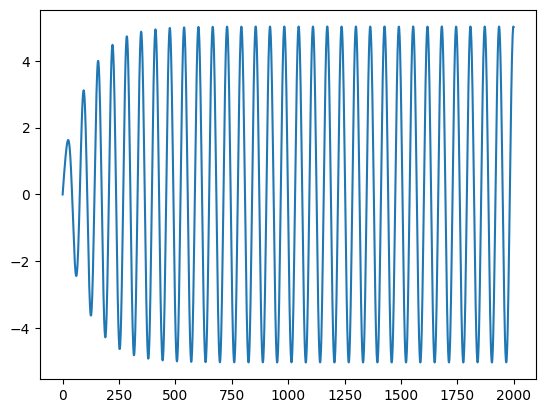

In [65]:
fig, ax = plt.subplots()
ax.plot(ys[:,0])

# 6.3

In [66]:
def A2(w):
    def rhs(y, t):
        w0 = 1.
        dydt = np.zeros(len(y))
        dydt[0] = y[1]
        beta = 0.1
        f0 = 1.0
        dydt[1] = -w0**2 * y[0] -2.*beta*y[1] + f0*np.sin(w*t)
        return dydt
    y = np.array([0,1])
    Nsteps = 2000
    dt = 0.1
    t = 0.
    ys = np.zeros((Nsteps, len(y)))
    for i in range(Nsteps):
        ys[i] = y
        y = rk_step(y, t, dt, rhs)
        t = t + dt
    return np.max(ys[Nsteps//2:,0]**2)

In [67]:
ws = np.linspace(0.1,4,100)
A2s = np.zeros(100)
for i in range(100):
    A2s[i] = A2(ws[i])

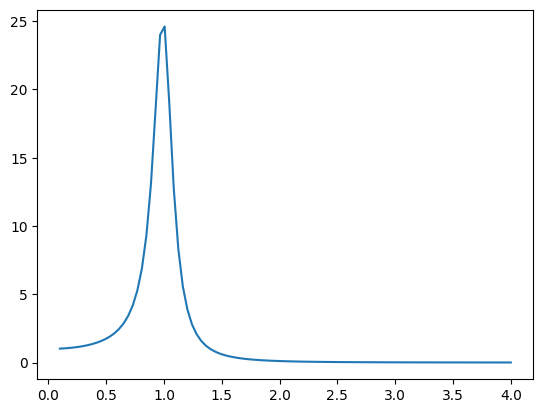

In [68]:
fig, ax = plt.subplots()
ax.plot(ws, A2s)